In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os,glob,random
import matplotlib.pyplot as plt

In [3]:
def walk_through_directory(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}'")

In [4]:
walk_through_directory(r"Bleached Corals and Healthy Corals Classification/Training")
walk_through_directory(r"Bleached Corals and Healthy Corals Classification/Testing")
walk_through_directory(r"Bleached Corals and Healthy Corals Classification/Validation")

There are 2 directories and 0 images in'Bleached Corals and Healthy Corals Classification/Training'
There are 0 directories and 3880 images in'Bleached Corals and Healthy Corals Classification/Training\bleached_corals'
There are 0 directories and 3504 images in'Bleached Corals and Healthy Corals Classification/Training\healthy_corals'
There are 2 directories and 0 images in'Bleached Corals and Healthy Corals Classification/Testing'
There are 0 directories and 485 images in'Bleached Corals and Healthy Corals Classification/Testing\bleached_corals'
There are 0 directories and 438 images in'Bleached Corals and Healthy Corals Classification/Testing\healthy_corals'
There are 2 directories and 0 images in'Bleached Corals and Healthy Corals Classification/Validation'
There are 0 directories and 485 images in'Bleached Corals and Healthy Corals Classification/Validation\bleached_corals'
There are 0 directories and 500 images in'Bleached Corals and Healthy Corals Classification/Validation\health

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Define the paths correctly
train_dir = r"Bleached Corals and Healthy Corals Classification/Training"
val_dir = r"Bleached Corals and Healthy Corals Classification/Validation"
test_dir = r"Bleached Corals and Healthy Corals Classification/Testing"

# Rescale images to normalize pixel values
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load dataset from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    seed=123,
    target_size=(224, 224),
    class_mode="binary"
)

valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    batch_size=64,
    seed=123,
    target_size=(224, 224),
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    seed=123,
    target_size=(224, 224),
    class_mode="binary"
)

# Get class indices
c = train_generator.class_indices
classes = list(c.keys())
print(classes)  # ✅ Should print ['bleached_corals', 'healthy_corals']


Found 7384 images belonging to 2 classes.
Found 985 images belonging to 2 classes.
Found 923 images belonging to 2 classes.
['bleached_corals', 'healthy_corals']


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification/Training",
                                                 batch_size=64,
                                                 seed=123,
                                                 target_size=(224,224),
                                                 class_mode="binary")
test_generator=test_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification/Testing",
                                                 batch_size=64,
                                                 seed=123,
                                                 target_size=(224,224),
                                                 class_mode="binary")
valid_generator=valid_datagen.flow_from_directory(r"Bleached Corals and Healthy Corals Classification/Validation",
                                                 batch_size=64,
                                                 seed=123,
                                                 target_size=(224,224),
                                                 class_mode="binary")


Found 7384 images belonging to 2 classes.
Found 923 images belonging to 2 classes.
Found 985 images belonging to 2 classes.


In [7]:
print(len(train_generator))
print(len(test_generator))
print(len(valid_generator))

116
15
16


In [8]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [9]:
type(mobile)

keras.engine.functional.Functional

In [10]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [11]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Flatten,Dense
x=mobile.layers[-5].output
x=GlobalAveragePooling2D()(x)
output=Dense(1,activation="sigmoid")(x)

In [12]:
from tensorflow.keras.models import Model
model=Model(inputs=mobile.input,outputs=output)

for layer in model.layers[:-25]:
    layer.trainable=False

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [14]:
# Print shapes of the first batch from the generators
train_data, train_labels = next(iter(train_generator))
valid_data, valid_labels = next(iter(valid_generator))
print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)
print('Validation data shape:', valid_data.shape)
print('Validation labels shape:', valid_labels.shape)


Train data shape: (64, 224, 224, 3)
Train labels shape: (64,)
Validation data shape: (64, 224, 224, 3)
Validation labels shape: (64,)


In [15]:
from tensorflow.keras.optimizers.legacy import Adam
model.build((64,224,224,3))
model.compile(optimizer="Adam",
             metrics=['accuracy'],
             loss='binary_crossentropy')


In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_callback=EarlyStopping(monitor='val_loss',
                            verbose=1,
                            mode="auto",
                            min_delta=0.001,
                            patience=5)
history=model.fit(train_generator,
                 steps_per_epoch=len(train_generator),
                 validation_data=valid_generator,
                  epochs=40,
                  validation_steps=len(valid_generator),
                 callbacks=[early_callback])

Epoch 1/40
116/116 [==============================] - 221s 2s/step - loss: 0.4272 - accuracy: 0.8196 - val_loss: 1.4434 - val_accuracy: 0.5665
Epoch 2/40
116/116 [==============================] - 196s 2s/step - loss: 0.1286 - accuracy: 0.9495 - val_loss: 0.3891 - val_accuracy: 0.8447
Epoch 3/40
116/116 [==============================] - 197s 2s/step - loss: 0.0862 - accuracy: 0.9682 - val_loss: 0.1766 - val_accuracy: 0.9299
Epoch 4/40
116/116 [==============================] - 204s 2s/step - loss: 0.0426 - accuracy: 0.9858 - val_loss: 0.4940 - val_accuracy: 0.8477
Epoch 5/40
116/116 [==============================] - 209s 2s/step - loss: 0.0358 - accuracy: 0.9873 - val_loss: 2.1676 - val_accuracy: 0.6569
Epoch 6/40
116/116 [==============================] - 216s 2s/step - loss: 0.0462 - accuracy: 0.9824 - val_loss: 2.9862 - val_accuracy: 0.5208
Epoch 7/40
116/116 [==============================] - 208s 2s/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.3830 - val_accuracy: 0.8934

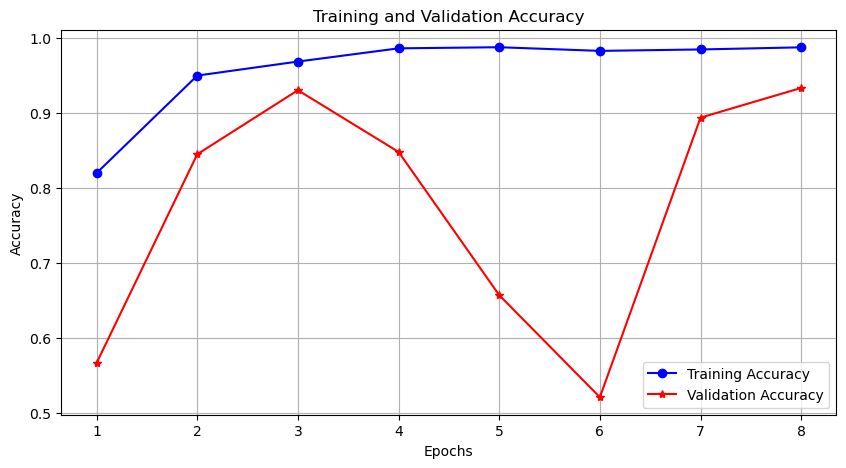

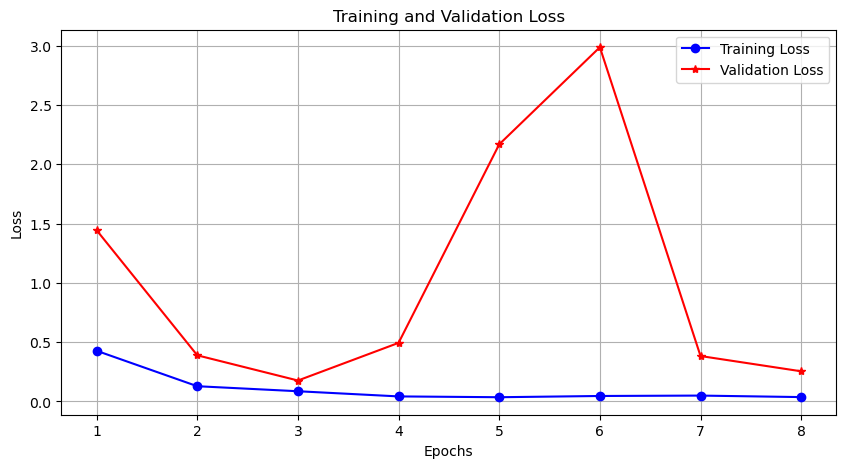

In [17]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")  # Blue circles & line
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")  # Red stars & line
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [18]:
# Extract final training and validation accuracy
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

loss,accuracy=model.evaluate(test_generator)
print("Test loss: ",loss)
print("Test accuracy: ",accuracy)

Final Training Accuracy: 98.71%
Final Validation Accuracy: 93.30%
15/15 [==============================] - 14s 885ms/step - loss: 0.2690 - accuracy: 0.9328
Test loss:  0.26903781294822693
Test accuracy:  0.9328277111053467


In [19]:
import pickle

# Save model as HDF5 format (recommended)
model.save("coral_classifier.h5")

# If you specifically want a pickle file, save the model separately
with open("coral_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [20]:
def load_and_prep_image(filename,img_shape=224,scale=True):
    img=tf.io.read_file(filename)
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[img_shape,img_shape])
    if scale:
        return img/255.0
    else:
        return img

In [21]:
def pred_and_plot(model,filename,class_names):
    img=load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[pred.argmax()]
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 1s 1s/step


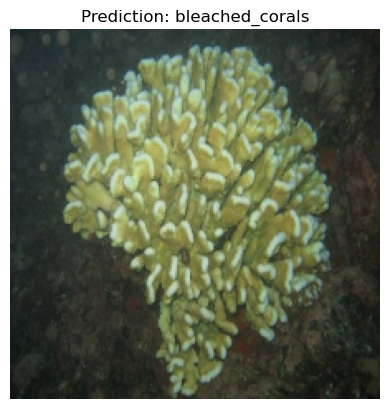

In [22]:
pred_and_plot(model,"Prediction Samples/bleached_internet.jpg",classes)

16/16 [==============================] - 15s 899ms/step
Confusion Matrix:
[[237 248]
 [234 266]]


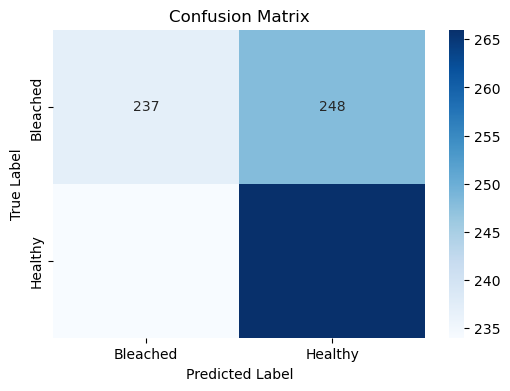

Classification Report:
                 precision    recall  f1-score   support

Bleached Corals       0.50      0.49      0.50       485
 Healthy Corals       0.52      0.53      0.52       500

       accuracy                           0.51       985
      macro avg       0.51      0.51      0.51       985
   weighted avg       0.51      0.51      0.51       985



In [24]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("coral_classifier.h5")  # Update with your model path

# Get true labels and predictions for the validation set
y_true = valid_generator.classes  # True labels
y_pred_probs = model.predict(valid_generator)  # Predictions (probabilities)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bleached', 'Healthy'], yticklabels=['Bleached', 'Healthy'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=['Bleached Corals', 'Healthy Corals'])
print("Classification Report:")
print(report)
